<a href="https://colab.research.google.com/github/JoyoS58/FileUpload/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS PRAKTIKUM**



1.   Buat Gamma Correction sesuai dengan petunjuk berikut
2.   Buat Simulasi Image Depth

3.   Buat modul Average Denoising
4.   Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:
5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.


1. **Buat Gamma Correction sesuai dengan petunjuk berikut**

 Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.
 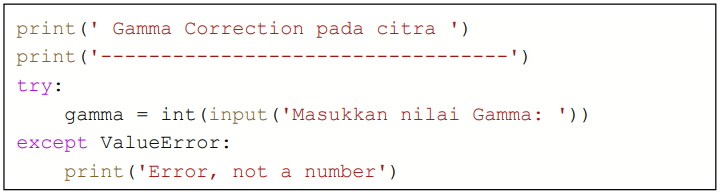

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


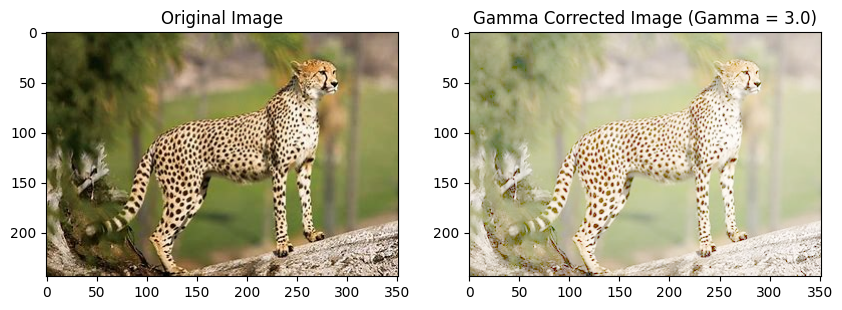

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Meminta input gamma dari pengguna
print('Gamma Correction pada citra')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0  # Default value jika input invalid

# Fungsi Gamma Correction
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Membaca gambar contoh
image = cv2.imread('/content/cheetah.jpeg')  # Ganti dengan path gambar Anda

# Melakukan Gamma Correction
corrected_image = gamma_correction(image, gamma)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title(f'Gamma Corrected Image (Gamma = {gamma})')
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.show()


2. **Buat Simulasi Image Depth**  

 Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst. Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.
 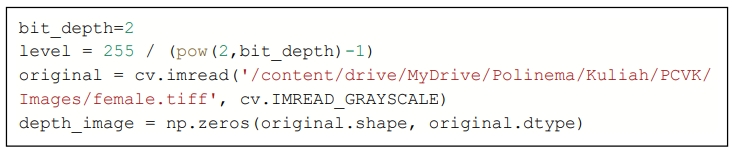

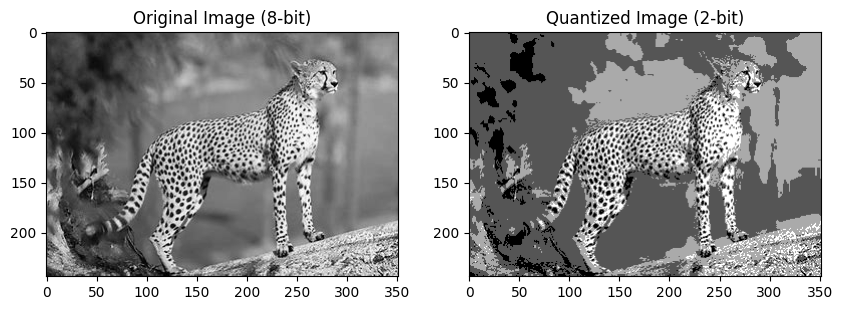

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Set nilai bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca citra grayscale
original = cv.imread('/content/cheetah.jpeg', cv.IMREAD_GRAYSCALE)

# Membuat array kosong untuk menyimpan hasil kuantisasi
depth_image = np.zeros(original.shape, original.dtype)

# Melakukan kuantisasi berdasarkan bit depth
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

# Menampilkan hasil kuantisasi dan gambar asli
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image (8-bit)')
plt.imshow(original, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image ({bit_depth}-bit)')
plt.imshow(depth_image, cmap='gray')

plt.show()
